# <font color='orange'>Implement SGD on Boston Dataset</font>

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

## 1. <font color='orange'>Data Analysis and Visualization</font>

### Description of Dataset

In [2]:
dataset=load_boston()
# print(dataset)
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#shape of data
boston = load_boston()
print("Shape :",boston.data.shape)

Shape : (506, 13)


In [4]:
print(boston.target[0:5])
# print(boston.data[0:5])
# print(boston.data[0][1:])
df=pd.DataFrame(boston.data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

[24.  21.6 34.7 33.4 36.2]


In [5]:
df[0:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['Target']=boston.target

In [7]:
df[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


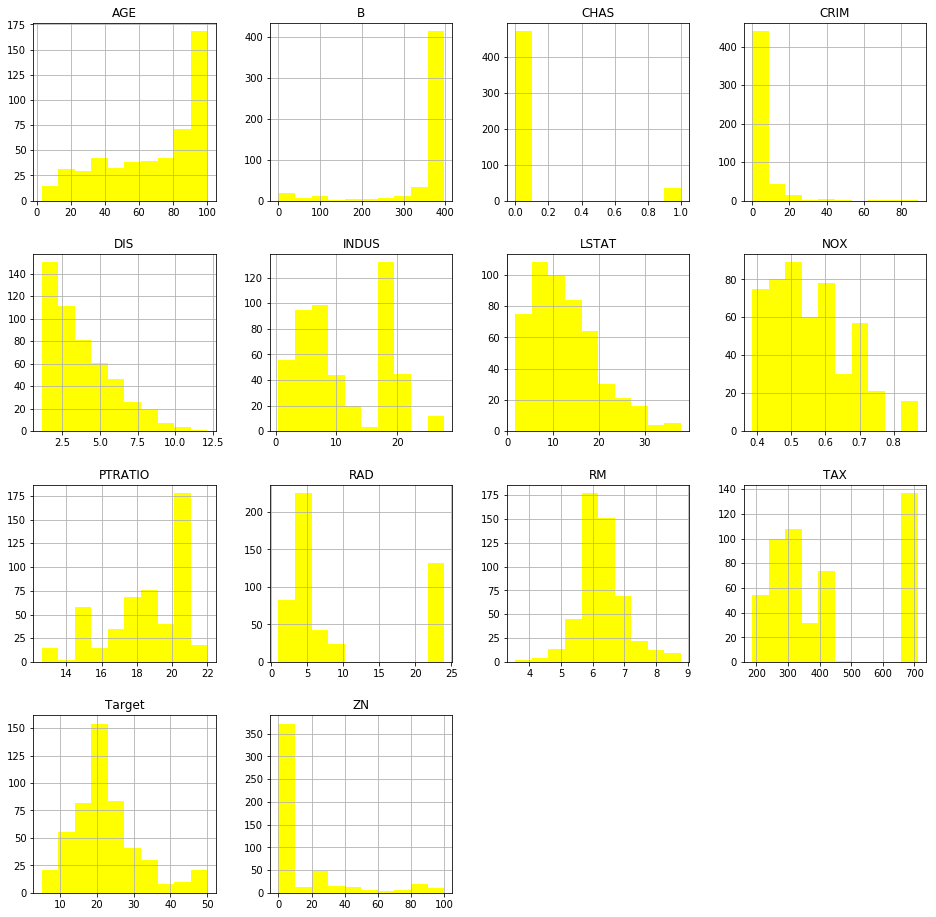

In [10]:
%matplotlib inline
df.hist(figsize=(16,16),color='yellow')

plt.show()

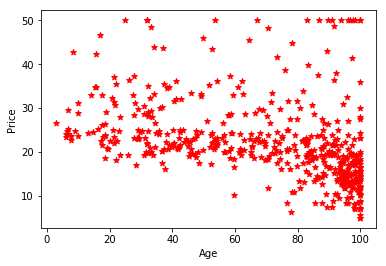

In [11]:

plt.scatter(df['AGE'],df['Target'],color='red',marker='*')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

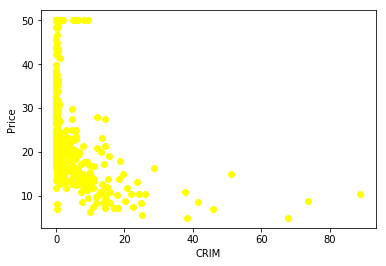

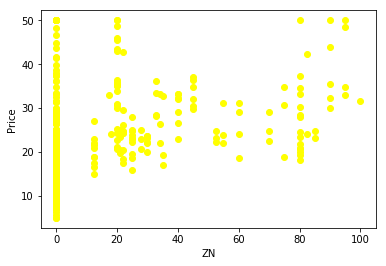

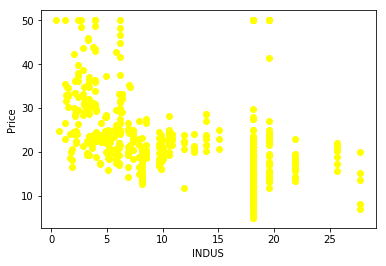

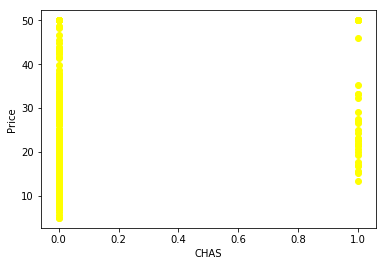

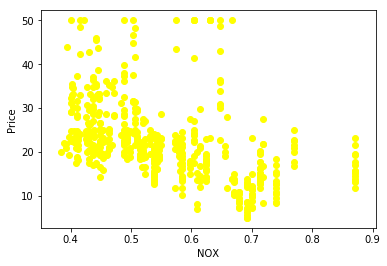

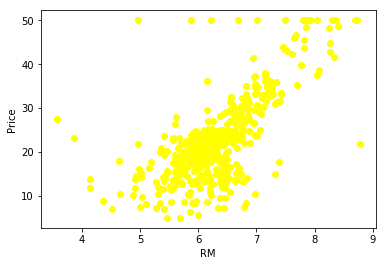

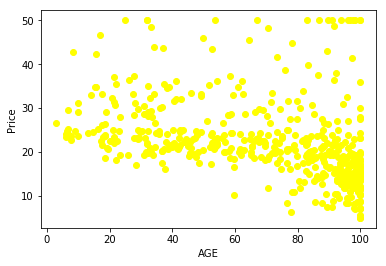

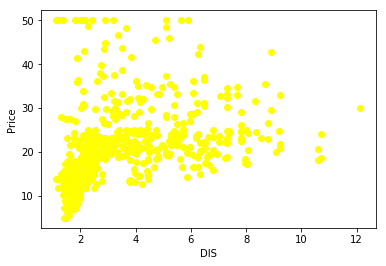

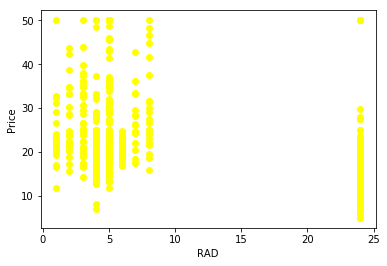

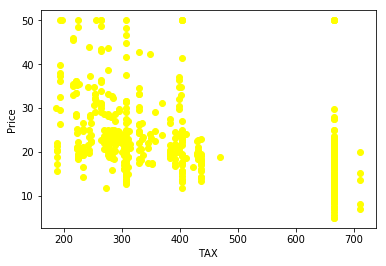

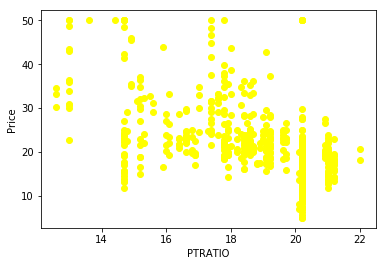

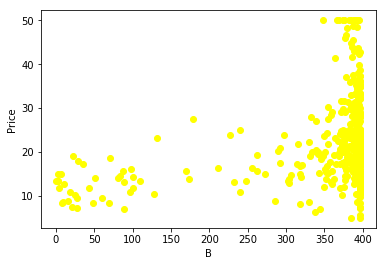

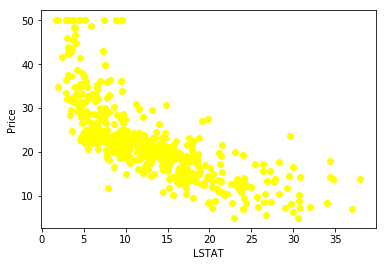

In [12]:

for val in df:
    if val!='Target':
        plt.scatter(df[val],df['Target'],color='yellow')
        plt.xlabel(val)
        plt.ylabel('Price')
        plt.show()
        

In [13]:
# Pearson Correlation
correl=df.corr(method='pearson')
print(correl)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

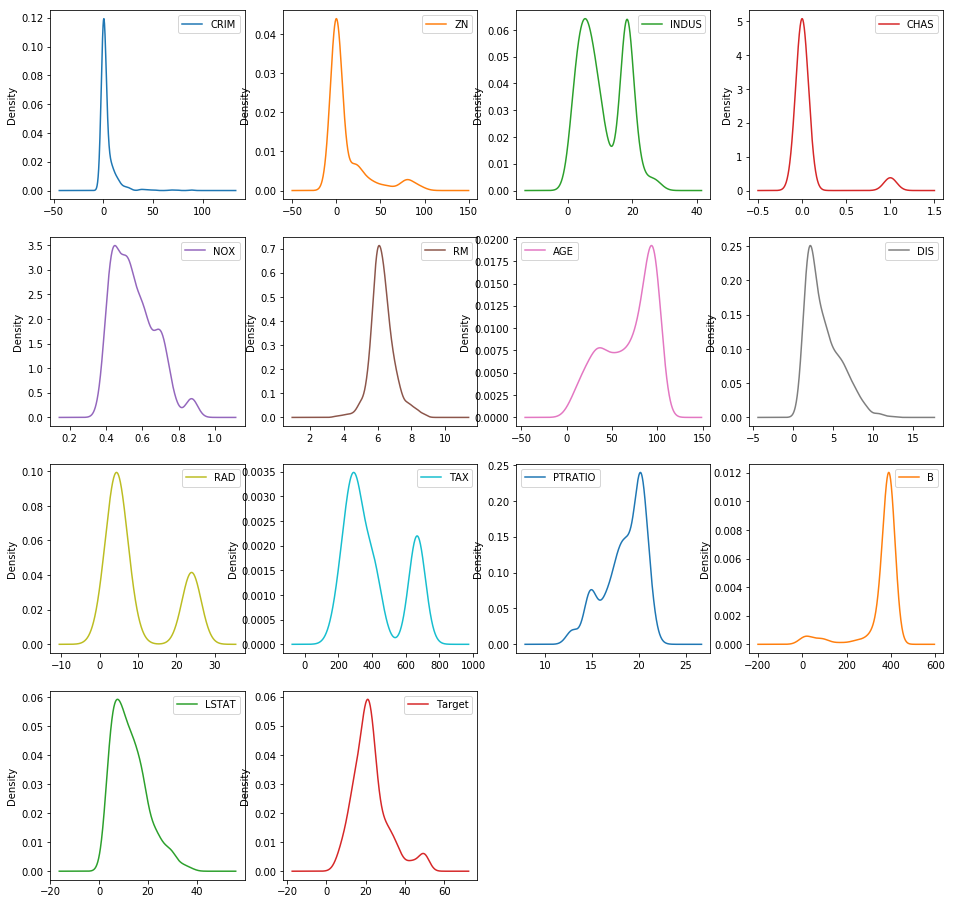

In [14]:
# Density plots
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

## 2.<font color='orange'>Data Preprocessing</font>

### Standardize Data

In [15]:
df1=df.drop(columns='Target')
df2=df['Target']
X=df1
y=df2
print(df1[:1],df2[:1])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09  1.0  296.0     15.3   

       B  LSTAT  
0  396.9   4.98   0    24.0
Name: Target, dtype: float64


In [16]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler()
X_new=stdslr.fit_transform(X)
y_new=y

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

## 3.<font color='orange'>Model Building</font>

In [18]:
def grad_descent(x,y,learn_rate):
    # initialization
    iterations=500
    n=len(x)
    w0=np.random.normal(0,1,13)
    #w0=np.zeros(13)
    #print(w0)
    b0=np.random.normal(0,1)
    #b0=0
    r=learn_rate
    #r=0.000001 # Learning rate
    
    eps=10**(-10)
    for i in range(iterations):
        error=(1/(2*n))*sum([er*er for er in (y- x @ w0.T -b0)])
        dLw=-(1/n)*sum( x.T @ (y - x @ w0.T - b0))
        dLb=-(1/n)*sum(y - x @ w0.T - b0)
        
        w0=w0-r*dLw # Update funtion
        b0=b0-r*dLb
        #r=r-10**(-3)
        if(error<eps) and (error>10**(20)):
            break;
        #print("w {} b {} learning rate: {}, iteration: {}, error: {}".format(w0,b0,r,i,error))
    #print("iteration:{} error:{}".format(i,error))
    return error
        

    

In [19]:
lst=[]
for i in range(2,12):
    learn_rate=10**(-i)
    val=grad_descent(X_train,y_train,learn_rate)
    lst.append(val)
    #print("\n*********************************\n")
    

print(lst)
print("Min error:",(min(lst)))
learn_rate=10**-(2+(lst.index(min(lst))))
print(learn_rate)

[48.38833190704098, 133.92665354691817, 268.498405207922, 305.84031137075687, 340.9458951740857, 299.3887002787784, 301.33354054867687, 342.84144552069824, 284.4963750143236, 344.68700317576963]
Min error: 48.38833190704098
0.01


In [20]:
# Model prediction
val_pred=grad_descent(X_test,y_test,learn_rate)
print(val_pred)

24.11222828969888


In [21]:
clf = SGDRegressor()
clf.fit(X_train, y_train)
print(mean_squared_error(y_test, clf.predict(X_test)))
clf_error=mean_squared_error(y_test, clf.predict(X_test))

23.51590620002726


In [22]:
from sklearn.linear_model import LinearRegression
clf1=LinearRegression()
clf1.fit(X_train,y_train)
print(mean_squared_error(y_test,clf1.predict(X_test)))
clf_error1=mean_squared_error(y_test,clf1.predict(X_test))

20.724023437339785


## 4.<font color='orange'>Conclusions</font>

In [23]:
# Difference in prediction by sklearn.linear_model.SGDRegressor and Our own model

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["S.No", "Model Name", "Mean Squared Error"]
x.add_row([1, "Linear Regression (Our Model)", val_pred])
x.add_row([2, "Linear Regression (Sklearn.SGDRegressor)", clf_error])
x.add_row([3, "Linear Regression (Sklearn.LinearRegression)", clf_error1])


print("="*100)
print('Conclusions'.center(100,' '))
print("="*100)
print(x.get_string(border=True, padding_width=3))

                                            Conclusions                                             
+----------+--------------------------------------------------+------------------------+
|   S.No   |                    Model Name                    |   Mean Squared Error   |
+----------+--------------------------------------------------+------------------------+
|    1     |          Linear Regression (Our Model)           |   24.11222828969888    |
|    2     |     Linear Regression (Sklearn.SGDRegressor)     |   23.51590620002726    |
|    3     |   Linear Regression (Sklearn.LinearRegression)   |   20.724023437339785   |
+----------+--------------------------------------------------+------------------------+


## 5.<font color='orange'>References</font>

1. Mayukh Sarkar explaination/discussion [https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3044/assignment-6-implement-sgd-for-linear-regression/3/module-3-foundations-of-natural-language-processing-and-machine-learning]

2. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

3. http://machinelearningmastery.com/